In [1]:
import os
from skimage import io
import pylab as plt
import warnings
from cs_sim.batch.batch_corrupt import batch_corrupt_image
from cs_sim.batch.batch_synth import batch_generate_img_with_filaments

from csnet.utils import get_paired_file_list

/research/sharedresources/cbi/common/Anna/anaconda3/envs/csnet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_first_img(dir_img, dir_gt, panel_size=3):
    fn_img, fn_label = get_paired_file_list(dir_img, dir_gt)

    fig, ax = plt.subplots(1, 2, figsize=(2 * panel_size, panel_size))
    for i, fn in enumerate([fn_img[0], fn_label[0]]):
        plt.sca(ax[i])
        img = io.imread(fn)
        if len(img.shape) > 2:
            img = img.max(0)
        io.imshow(img)
    plt.tight_layout()

In [3]:
name_gt = 'gt'
name_img = 'img'

subfolders = ['train', 'val', 'test']
n_img = [200, 50, 10]

dims = ['_2D', '_3D']
imgshapes = [(512, 512), (64, 128, 128)]
corruption_steps_2D=[
    ('perlin_noise', {'size': 50, 'value': 0.1}),
    ('poisson_noise', {'snr': 2}),
    ('convolve', {'sigma': 5}),
    ('gaussian_noise', {'snr': 10})
]
corruption_steps_3D=[
    ('perlin_noise', {'size': 50, 'value': 0.1}),
    ('poisson_noise', {'snr': 2}),
    ('convolve', {'sigma': 2}),
    ('gaussian_noise', {'snr': 50})
]

data/semantic_2D
train 200
val 50
test 10
data/semantic_3D
train 200
val 50
test 10
data/instance_2D
train 200
val 50
test 10


/research/sharedresources/cbi/common/Anna/anaconda3/envs/csnet/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


data/instance_3D
train 200
val 50
test 10


/research/sharedresources/cbi/common/Anna/anaconda3/envs/csnet/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


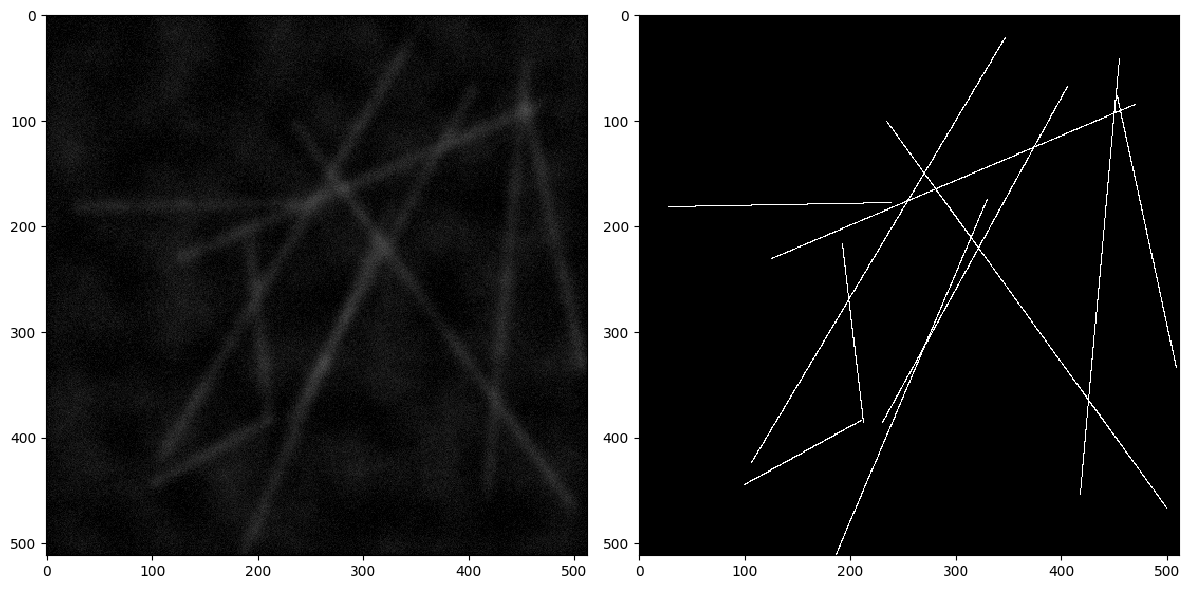

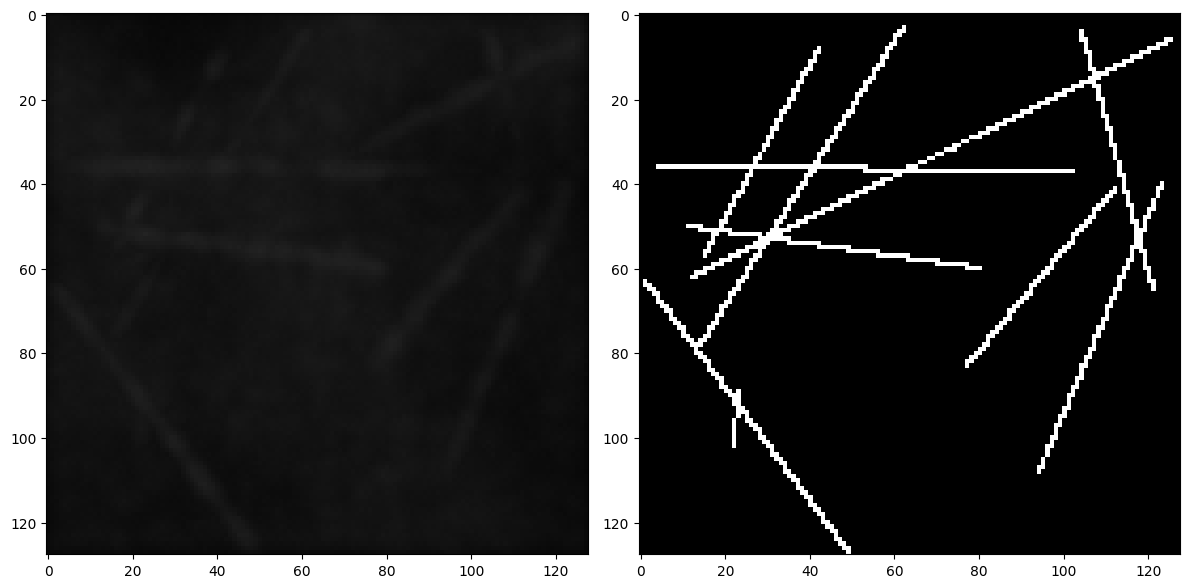

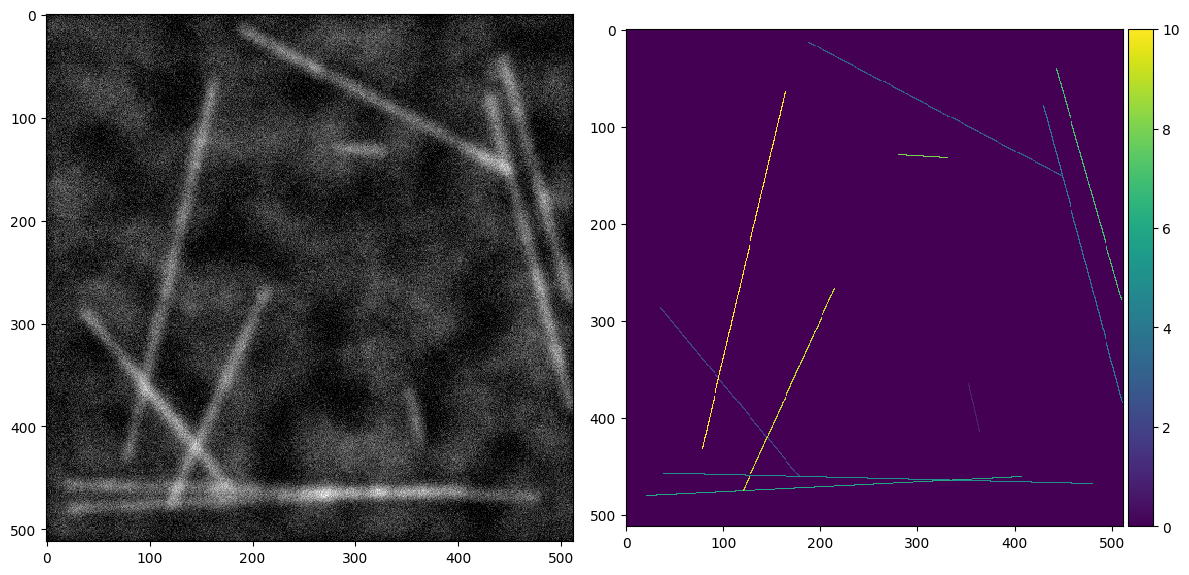

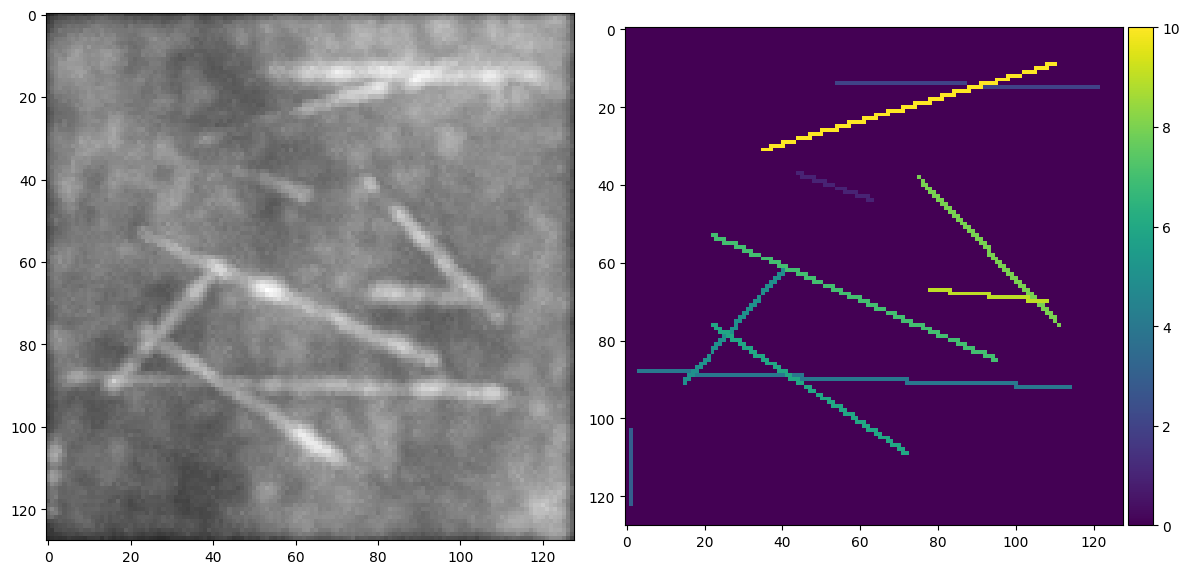

In [4]:
for data_dir_base, instance in zip(['data/semantic', 'data/instance'],
                                   [False, True]):
    for dim, imgshape, corruption_steps in zip(dims, imgshapes, [corruption_steps_2D, corruption_steps_3D]):
        
        # generate data
        data_dir = data_dir_base + dim
        print(data_dir)
        for sf, n in zip(subfolders, n_img):
            print(sf, n)
            dir_gt = os.path.join(data_dir, sf, name_gt)
            dir_img = os.path.join(data_dir, sf, name_img)

            os.makedirs(dir_gt, exist_ok=True)
            os.makedirs(dir_img, exist_ok=True)
            
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")

                batch_generate_img_with_filaments(n_img=n, n_jobs=20, dir_out=dir_gt,
                                              imgshape=imgshape, n_filaments=10, 
                                              instance=instance, thick=False, 
                                              maxval=255, n_points=1000)
                batch_corrupt_image(dir_gt, dir_img, n_jobs=20,
                                    corruption_steps=corruption_steps)
        # display data
        plot_first_img(dir_img, dir_gt, panel_size=6)